In [63]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, auc,roc_curve
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# names = [
#     "KNN",
#     "SVM",
#     "Decision Tree",
#     "Random Forest",
#     "RNA",
#     "Naive Bayes",
# ]

# classifiers = [
#     KNeighborsClassifier(5),
#     SVC(kernel="linear", C=0.025),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     GaussianNB(),
# ]

smote = SMOTE(random_state=42)
nearmiss = NearMiss(version=1)

In [64]:
benign = pd.read_csv("./dataset_benign.csv")

benign.info()

malware = pd.read_csv("./dataset_malware.csv")

malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4114 entries, 0 to 4113
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4114 non-null   object 
 1   e_magic                       4114 non-null   int64  
 2   e_cblp                        4114 non-null   int64  
 3   e_cp                          4114 non-null   int64  
 4   e_crlc                        4114 non-null   int64  
 5   e_cparhdr                     4114 non-null   int64  
 6   e_minalloc                    4114 non-null   int64  
 7   e_maxalloc                    4114 non-null   int64  
 8   e_ss                          4114 non-null   int64  
 9   e_sp                          4114 non-null   int64  
 10  e_csum                        4114 non-null   int64  
 11  e_ip                          4114 non-null   int64  
 12  e_cs                          4114 non-null   int64  
 13  e_l

In [65]:
data = pd.concat([benign, malware], ignore_index=True)

# data = data.sample(frac=1, ignore_index=True)

data.head()


,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,69fe178f-26e7-43a9-aa7d-2b616b672dde_eventlogs...,23117,144,3,0,4,0,65535,0,184,...,1073741888,0,0,0,0,4192,0,12288,0,3584
1,6bea57fb-8dfb-4177-9ae8-42e8b3529933_RuntimeDe...,23117,144,3,0,4,0,65535,0,184,...,1073741888,0,0,0,0,4192,0,12288,0,3584
2,aadauthhelper.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,37,211,10,438464,438888,475136,458752,0
3,aadcloudap.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,44,270,3,940080,940228,983040,958464,0
4,aadjcsp.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,25,110,1,89088,89168,106496,102400,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91175 entries, 0 to 91174
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          91175 non-null  object 
 1   e_magic                       91175 non-null  int64  
 2   e_cblp                        91175 non-null  int64  
 3   e_cp                          91175 non-null  int64  
 4   e_crlc                        91175 non-null  int64  
 5   e_cparhdr                     91175 non-null  int64  
 6   e_minalloc                    91175 non-null  int64  
 7   e_maxalloc                    91175 non-null  int64  
 8   e_ss                          91175 non-null  int64  
 9   e_sp                          91175 non-null  int64  
 10  e_csum                        91175 non-null  int64  
 11  e_ip                          91175 non-null  int64  
 12  e_cs                          91175 non-null  int64  
 13  e

In [67]:
# plt.figure(figsize=(8, 6))
# ax=sns.countplot(data['Malware'])
# ax.set_xticklabels(['Benign', 'Malware'])

In [68]:
# #The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name', 'Malware'], axis = 1)
y = data['Malware']

# X, y = smote.fit_resample(X, y)
X, y = nearmiss.fit_resample(X, y)

In [69]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
# X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.        , -0.1163508 , -0.09552162, ...,  0.77241679,
        -0.04936788, -0.05313268],
       [ 0.        , -0.08719944, -0.09500356, ...,  0.13521053,
        -0.04617089, -0.05313268],
       [ 0.        , -0.08719944, -0.09500356, ...,  0.5339531 ,
        -0.04320854, -0.05313268],
       ...,
       [ 0.        , -0.08719944, -0.09500356, ..., -0.25571356,
        -0.04936788, -0.05313268],
       [ 0.        , -0.08719944, -0.09500356, ..., -0.09543468,
        -0.04784271, -0.05313268],
       [ 0.        , -0.08719944, -0.09500356, ...,  0.6199564 ,
        -0.04270993, -0.05313268]])

In [70]:
# knn = neighbors.KNeighborsClassifier()

# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)

In [71]:
models = []

# models.append(('DT', DecisionTreeClassifier(max_depth=5)))
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

models

[('LR', LogisticRegression(max_iter=10000)),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [72]:
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
# 	kfold = model_selection.KFold(n_splits=10)
# 	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
# # boxplot algorithm comparison
# fig = plt.figure(figsize=[20,10])
# fig.suptitle('Comparison between different MLAs')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [73]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegression(max_iter=10000),
    
    # #Ensemble Methods
    # ensemble.RandomForestClassifier(),
    # #SVM
    svm.SVC(probability=True),
    # #Trees    
    # tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [74]:
# MLA_columns = []
# MLA_compare = pd.DataFrame(columns = MLA_columns)

# row_index = 0
# for alg in MLA:  
#     alg.fit(X_train, y_train)
#     y_pred = alg.predict(X_test)

#     # print("Accuracy:", accuracy_score(y_test, y_pred))

#     # print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

#     # sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    
#     fp, tp, th = roc_curve(y_test, y_pred)
#     MLA_name = alg.__class__.__name__
#     MLA_compare.loc[row_index,'MLA used'] = MLA_name
#     MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
#     MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
#     MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, y_pred)
#     MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, y_pred)
#     MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

#     row_index+=1

    
# MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
# MLA_compare

Accuracy: 0.9933171324422844
              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99       826
     Malware       1.00      0.99      0.99       820

    accuracy                           0.99      1646
   macro avg       0.99      0.99      0.99      1646
weighted avg       0.99      0.99      0.99      1646



<AxesSubplot:>

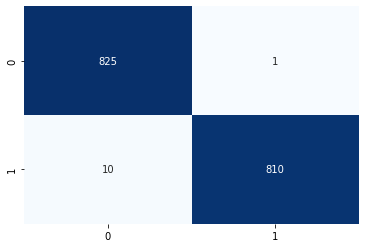

In [75]:
lr =  linear_model.LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)